In [1]:
%matplotlib inline

Routines for mapping available at: https://ocefpaf.github.io/python4oceanographers/blog/2015/06/22/osm/

In [2]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

extent = [-180, -135, 45, 80]

***using Natural Earth***

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


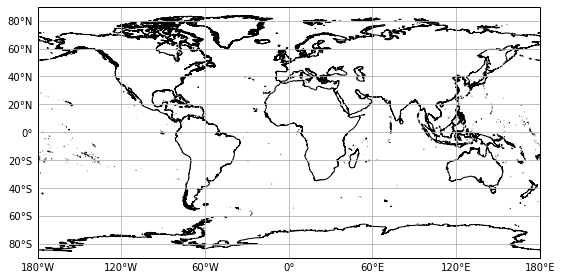

In [3]:
from cartopy.feature import NaturalEarthFeature

coast = NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')

fig, ax = make_map(projection=ccrs.PlateCarree())

#ax.set_extent(extent)

feature = ax.add_feature(coast, edgecolor='black')

***using basic coastline command***

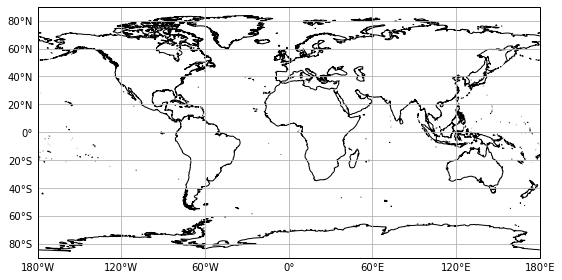

In [4]:
fig,ax = make_map(projection=ccrs.PlateCarree())

ax.coastlines(resolution='50m')

***using OSM Generalized coastline maps***

http://openstreetmapdata.com/data/generalized-coastlines

ShapefileException: Unable to open data/simple_coastlines/Alaska.dbf or data/simple_coastlines/Alaska.shp.

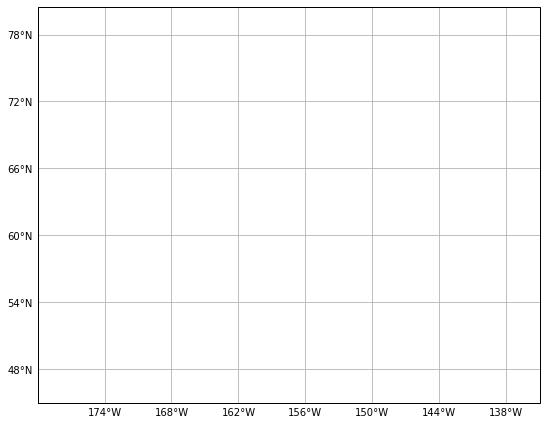

In [6]:
import cartopy.feature as cfeature

fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)

shp = cfeature.shapereader.Reader('data/simple_coastlines/Alaska.shp')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')

The previous routine doesn't plot the shapefile as would be expected.  The shapefile itself is valid and tested in QGIS so the questions is "what is preventing the succesful plot of a map".

ShapefileException: Unable to open data/coastlines/Alaska.dbf or data/coastlines/Alaska.shp.

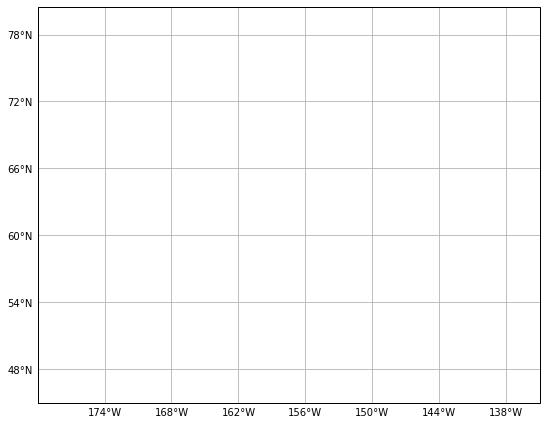

In [7]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)

shp = cfeature.shapereader.Reader('data/coastlines/Alaska.shp')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')

***using OSM (trimmed) coastline maps***

http://openstreetmapdata.com/data/coastlines

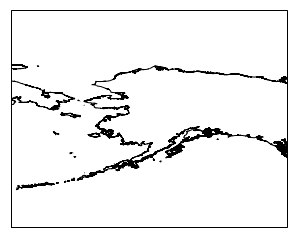

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)

shp = cfeature.shapereader.Reader('data/coastlines/Alaska.shp')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='white',
                      edgecolor='black')